In [ ]:
#Given the money spent on TV Radio and newspaper, find out which media has influenced sales more using lasso regression model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [3]:
data = pd.read_csv('Advertising.csv')
data.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
names = data.columns
names

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
data.rename({"Unnamed: 0" : "a"},axis=1,inplace=True) # Assuming 'Unnamed: 0' is the original column name
data.drop(["a"], axis=1,inplace=True)

In [6]:
x = data.drop(["Sales"],axis=1)
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [7]:
y = data["Sales"].values
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [8]:
names = x.columns
names

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [9]:
rng = range(len(names))
rng

range(0, 3)

In [10]:
ls = Lasso(alpha=0.001)
model = ls.fit(x,y)

In [11]:
cf = model.coef_
cf

array([ 0.04576452,  0.18852359, -0.00103379])

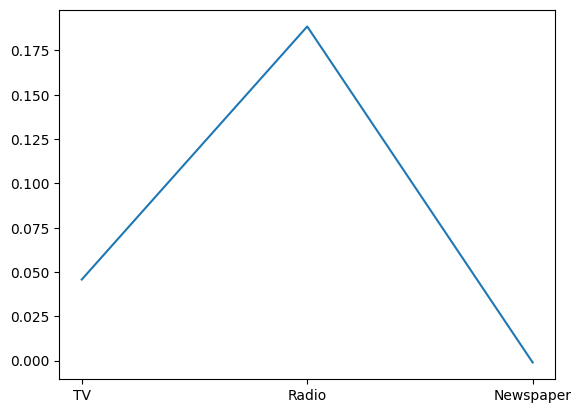

In [12]:
plt.plot(rng,cf)
plt.xticks(rng,names)
plt.show()

In [13]:
print(r2_score(y,model.predict(x)))

0.8972106378011765


In [14]:
new_data = [[150,41,60]]
sales = ls.predict(new_data)
sales

array([17.47106188])